# Exploration des données des logs de dashboard

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Lire un fichier Parquet
df = pd.read_parquet('../../data/logParquet/DetailedDashboardLogs_sub_2411222036.parquet')

# Afficher les premières lignes
print(df.head())

       Id                  DatetimeLog         Login         FirstName  \
0  130462   2024-09-10 07:45:50.380693  Login_sub_81  FirstName_sub_35   
1  130463  2024-09-10 08:39:19.1672942  Login_sub_68   FirstName_sub_3   
2  130464  2024-09-10 08:39:20.7059102  Login_sub_68   FirstName_sub_3   
3  130465  2024-09-10 09:10:27.6208659  Login_sub_44  FirstName_sub_47   
4  130466  2024-09-10 09:32:57.2763134  Login_sub_91  FirstName_sub_59   

          LastName                                      DashboardId  \
0  LastName_sub_65  Dashboards_5fe040ca-abde-4015-ad13-7ff59bdae84c   
1  LastName_sub_28  Dashboards_1a5cc45e-b457-4990-b9b3-a8f327b31b1b   
2  LastName_sub_28  Dashboards_1a5cc45e-b457-4990-b9b3-a8f327b31b1b   
3  LastName_sub_34  Dashboards_926dc574-220b-4e52-8650-b3a8d3e9d654   
4  LastName_sub_75  Dashboards_fed30479-257f-4da2-899d-91d7f2a01556   

                             DashboardName      TabName  \
0                         Pilotage Support        Intro   
1         

In [69]:
# Conversion de la colonne DatetimeLog en format exploitable

# Convertir en datetime
df['DatetimeLog'] = pd.to_datetime(df['DatetimeLog'])

print(df['DatetimeLog'])

epoch = pd.Timestamp('1900-01-01')
df['DatetimeLog(RAW)'] = (df['DatetimeLog'] - epoch).dt.total_seconds() / 86400

print(df['DatetimeLog(RAW)'])

0       2024-09-10 07:45:50.380693000
1       2024-09-10 08:39:19.167294200
2       2024-09-10 08:39:20.705910200
3       2024-09-10 09:10:27.620865900
4       2024-09-10 09:32:57.276313400
                     ...             
10398   2024-11-13 10:16:52.178154600
10399   2024-11-13 10:17:01.860578300
10400   2024-11-13 10:17:04.082986600
10401   2024-11-13 10:19:45.211887800
10402   2024-11-13 10:24:09.513584800
Name: DatetimeLog, Length: 10403, dtype: datetime64[ns]
0        45543.323500
1        45543.360639
2        45543.360656
3        45543.382264
4        45543.397885
             ...     
10398    45607.428382
10399    45607.428494
10400    45607.428519
10401    45607.430384
10402    45607.433443
Name: DatetimeLog(RAW), Length: 10403, dtype: float64


In [22]:
n_unique_dashboardsId = df['DashboardId'].nunique()
print(f"Nombre de dashboards différents : {n_unique_dashboardsId}")

Nombre de dashboards différents : 149


In [23]:
n_unique_dashboardsName = df['DashboardName'].nunique()
print(f"Nombre de dashboards différents : {n_unique_dashboardsName}")

Nombre de dashboards différents : 147


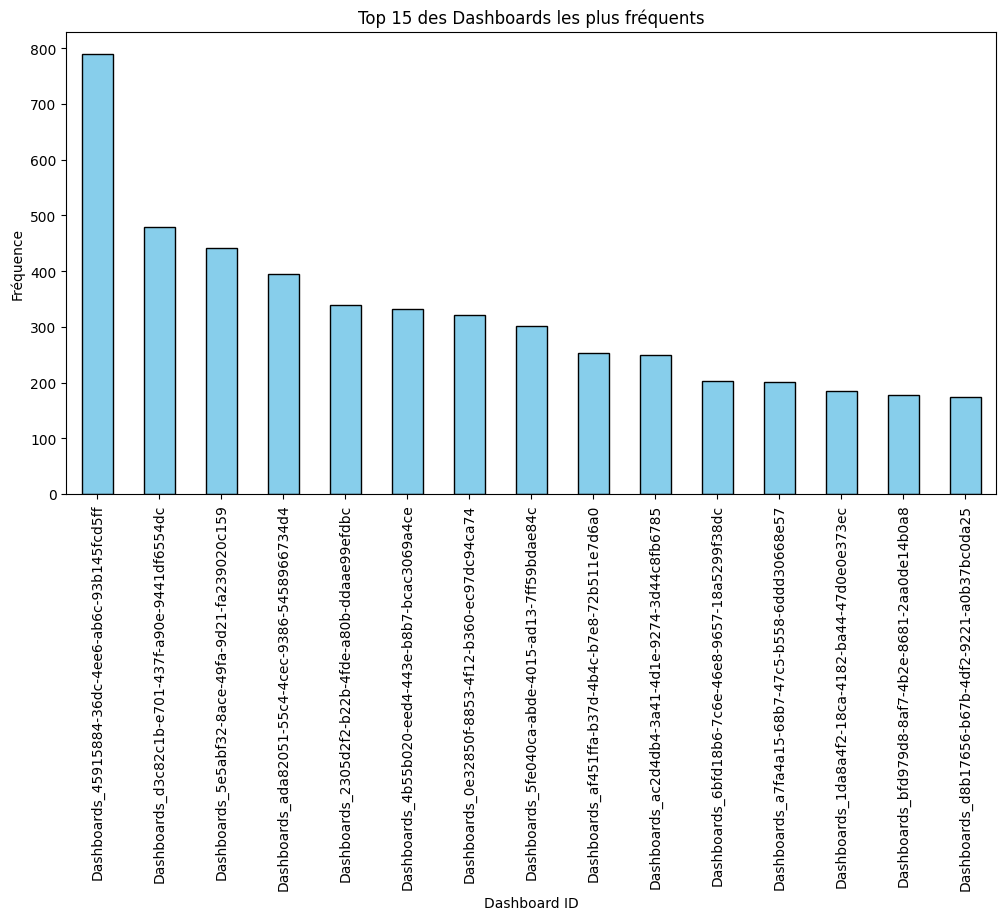

In [20]:
# Compter les occurrences des DashboardId
dashboard_counts = df['DashboardId'].value_counts()

# Sélectionner les 15 plus fréquents
top_dashboards = dashboard_counts.head(15)

plt.figure(figsize=(12, 6))
top_dashboards.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Dashboard ID")
plt.ylabel("Fréquence")
plt.title("Top 15 des Dashboards les plus fréquents")
plt.show()

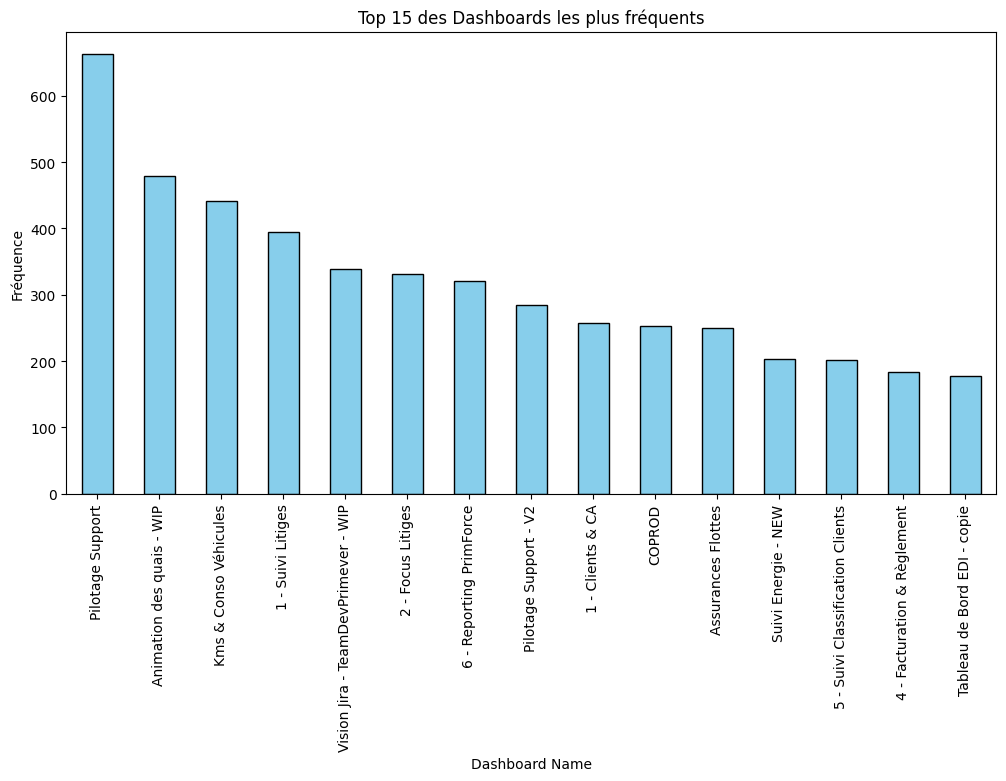

In [21]:
# Compter les occurrences des DashboardName
dashboard_counts = df['DashboardName'].value_counts()

# Sélectionner les 15 plus fréquents
top_dashboards = dashboard_counts.head(15)

plt.figure(figsize=(12, 6))
top_dashboards.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Dashboard Name")
plt.ylabel("Fréquence")
plt.title("Top 15 des Dashboards les plus fréquents")
plt.show()

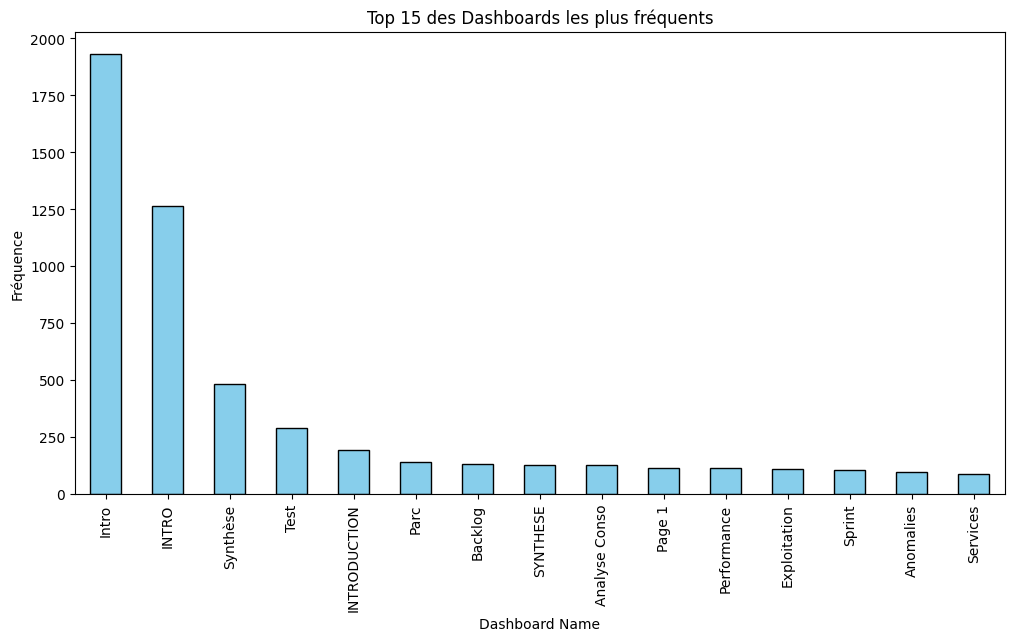

In [52]:
# Compter les occurrences des Tabs
tab_counts = df['TabName'].value_counts()

# Sélectionner les 15 plus fréquents
top_tabs = tab_counts.head(15)

plt.figure(figsize=(12, 6))
top_tabs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Dashboard Name")
plt.ylabel("Fréquence")
plt.title("Top 15 des Dashboards les plus fréquents")
plt.show()

In [24]:
n_unique_login = df['Login'].nunique()
print(f"Nombre de Login différents : {n_unique_login}")

Nombre de Login différents : 109


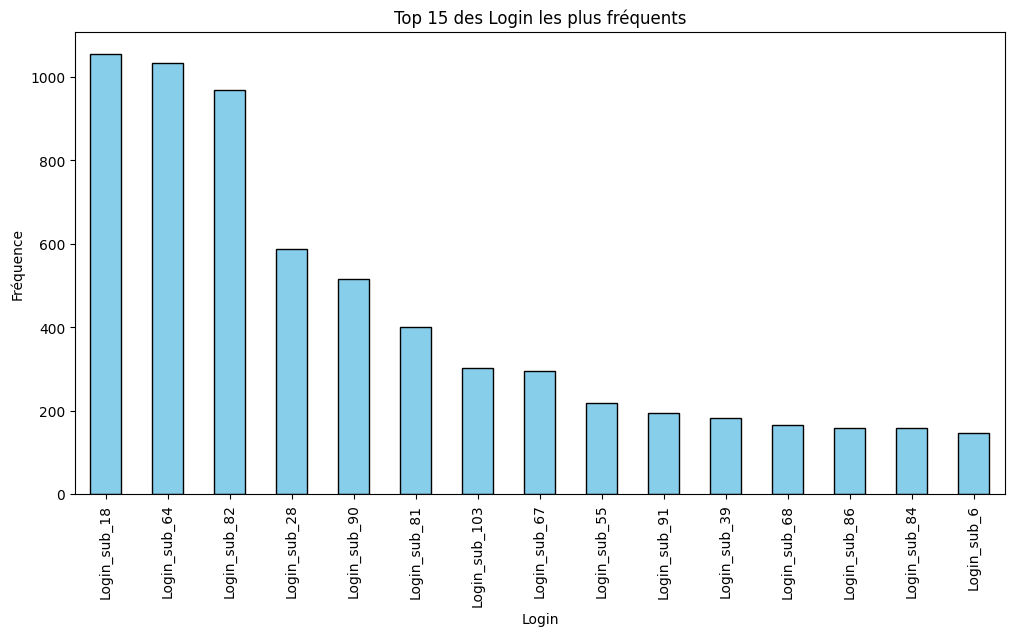

In [25]:
# Compter les occurrences des Login
login_counts = df['Login'].value_counts()

# Sélectionner les 15 plus fréquents
top_login = login_counts.head(15)

plt.figure(figsize=(12, 6))
top_login.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel("Login")
plt.ylabel("Fréquence")
plt.title("Top 15 des Login les plus fréquents")
plt.show()

In [40]:
# Extraire le jour de la semaine en texte
jours_semaine = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
df['jour_semaine'] = df['DatetimeLog'].dt.weekday.map(lambda x: jours_semaine[x])

# Extraire l'heure arrondie à la tranche de 30 min
df['heure'] = df['DatetimeLog'].dt.hour + (df['DatetimeLog'].dt.minute // 60) * 0.5

# Formater l'affichage de l'heure en "9h00", "9h30", etc.
df['horaire'] = df['heure'].apply(lambda x: f"{int(x)}h{int((x % 1) * 60):02d}")

# Concaténer jour et horaire pour une meilleure lisibilité
df['jour_horaire'] = df['jour_semaine'].astype(str) + " " + df['horaire']

In [45]:
print(df['jour_horaire'])

0            mardi 7h00
1            mardi 8h00
2            mardi 8h00
3            mardi 9h00
4            mardi 9h00
              ...      
10398    mercredi 10h00
10399    mercredi 10h00
10400    mercredi 10h00
10401    mercredi 10h00
10402    mercredi 10h00
Name: jour_horaire, Length: 10403, dtype: object


In [46]:
# Séparer jour et heure
df[['jour', 'horaire']] = df['jour_horaire'].str.split(' ', expand=True)

# Convertir le jour en catégorie ordonnée
df['jour'] = pd.Categorical(df['jour'], categories=jours_semaine, ordered=True)

# Convertir l'heure en entier pour tri correct
df['heure_num'] = df['horaire'].str.replace('h', '').astype(int)

# Trier d'abord par jour, puis par heure
df = df.sort_values(['jour', 'heure_num']).drop(columns=['jour', 'heure_num'])

In [47]:
print(df['jour_horaire'])

1441        lundi 7h00
1442        lundi 7h00
1443        lundi 7h00
1444        lundi 7h00
1445        lundi 7h00
             ...      
4644    dimanche 22h00
4645    dimanche 22h00
8661    dimanche 23h00
8662    dimanche 23h00
8663    dimanche 23h00
Name: jour_horaire, Length: 10403, dtype: object


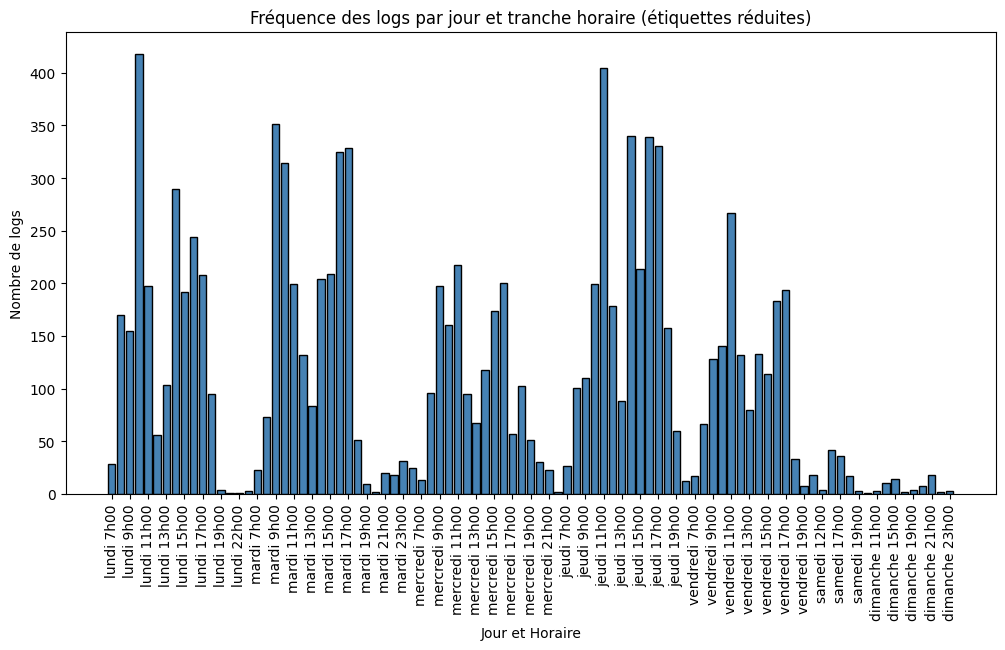

In [49]:
# Compter la fréquence des valeurs
freq_logs = df['jour_horaire'].value_counts().reset_index()
freq_logs.columns = ['jour_horaire', 'count']

# Fusionner avec le dataframe trié pour conserver l'ordre correct
freq_logs = df[['jour_horaire']].drop_duplicates().merge(freq_logs, on='jour_horaire', how='left')

# Taille du graphique
plt.figure(figsize=(12, 6))

# Tracer l'histogramme
plt.bar(freq_logs['jour_horaire'], freq_logs['count'], color='steelblue', edgecolor='black')

# Espacer les labels (afficher une étiquette toutes les 5 valeurs)
step = 2  # Modifier ce nombre si besoin
plt.xticks(range(0, len(freq_logs), step), freq_logs['jour_horaire'][::step], rotation=90, fontsize=10)

# Ajouter les labels
plt.xlabel("Jour et Horaire")
plt.ylabel("Nombre de logs")
plt.title("Fréquence des logs par jour et tranche horaire (étiquettes réduites)")

# Afficher le graphique
plt.show()

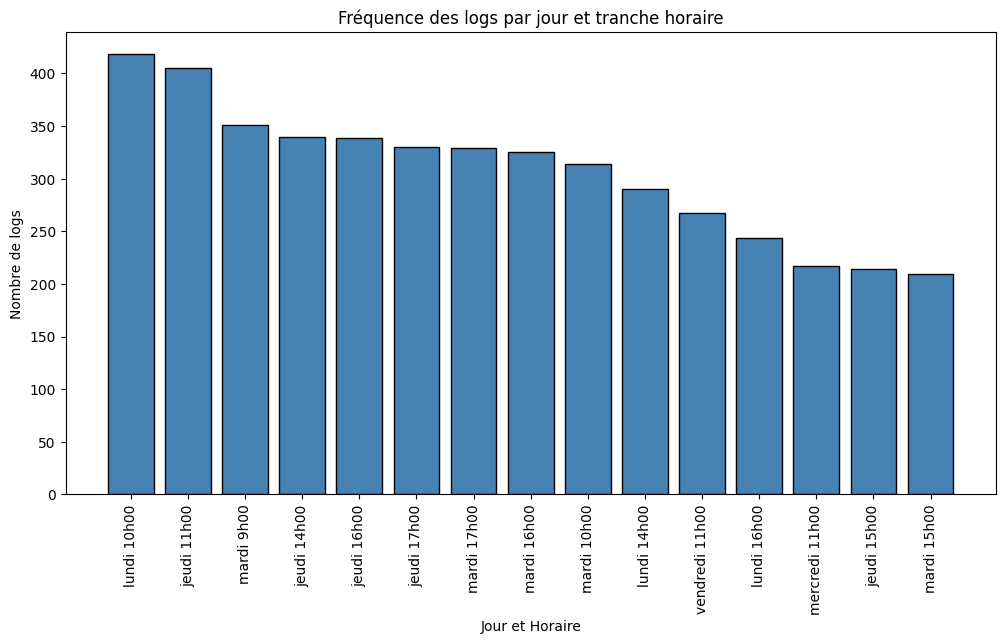

In [54]:
# Compter la fréquence des valeurs
freq_logs = df['jour_horaire'].value_counts().reset_index()
freq_logs.columns = ['jour_horaire', 'count']

top_freq_logs = freq_logs.head(15)

# Taille du graphique
plt.figure(figsize=(12, 6))

# Tracer l'histogramme
plt.bar(top_freq_logs['jour_horaire'], top_freq_logs['count'], color='steelblue', edgecolor='black')

# Espacer les labels (afficher une étiquette toutes les 5 valeurs)
step = 1  # Modifier ce nombre si besoin
plt.xticks(range(0, len(top_freq_logs), step), top_freq_logs['jour_horaire'][::step], rotation=90, fontsize=10)

# Ajouter les labels
plt.xlabel("Jour et Horaire")
plt.ylabel("Nombre de logs")
plt.title("Fréquence des logs par jour et tranche horaire")

# Afficher le graphique
plt.show()

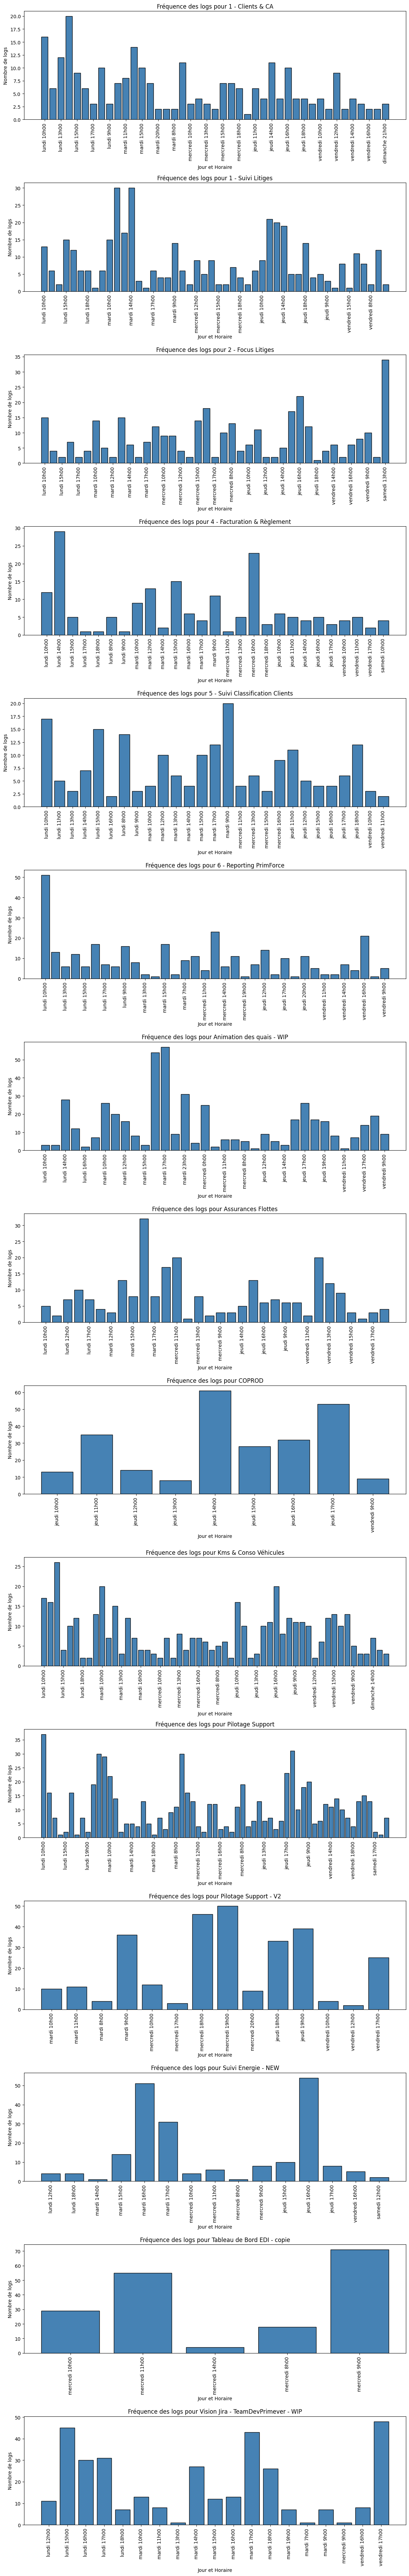

In [53]:

# Sélectionner les 15 DashboardName les plus fréquents
top_dashboards = df['DashboardName'].value_counts().head(15).index
df_top = df[df['DashboardName'].isin(top_dashboards)]

# Compter les occurrences par DashboardName et jour_horaire
freq_logs = df_top.groupby(['DashboardName', 'jour_horaire']).size().reset_index(name='count')

# Trier les jours et horaires
freq_logs[['jour', 'horaire']] = freq_logs['jour_horaire'].str.split(' ', expand=True)
freq_logs['jour'] = pd.Categorical(freq_logs['jour'], categories=jours_semaine, ordered=True)
freq_logs = freq_logs.sort_values(['DashboardName', 'jour', 'horaire'])

# Générer un graphique par DashboardName
dashboard_list = freq_logs['DashboardName'].unique()
fig, axes = plt.subplots(len(dashboard_list), 1, figsize=(12, 5 * len(dashboard_list)))

if len(dashboard_list) == 1:
    axes = [axes]  # S'assurer que axes est une liste si un seul graphique

for ax, dashboard in zip(axes, dashboard_list):
    subset = freq_logs[freq_logs['DashboardName'] == dashboard]
    ax.bar(subset['jour_horaire'], subset['count'], color='steelblue', edgecolor='black')
    ax.set_title(f"Fréquence des logs pour {dashboard}")
    ax.set_xlabel("Jour et Horaire")
    ax.set_ylabel("Nombre de logs")
    ax.set_xticks(range(0, len(subset), max(1, len(subset) // 15)))
    ax.set_xticklabels(subset['jour_horaire'][::max(1, len(subset) // 15)], rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

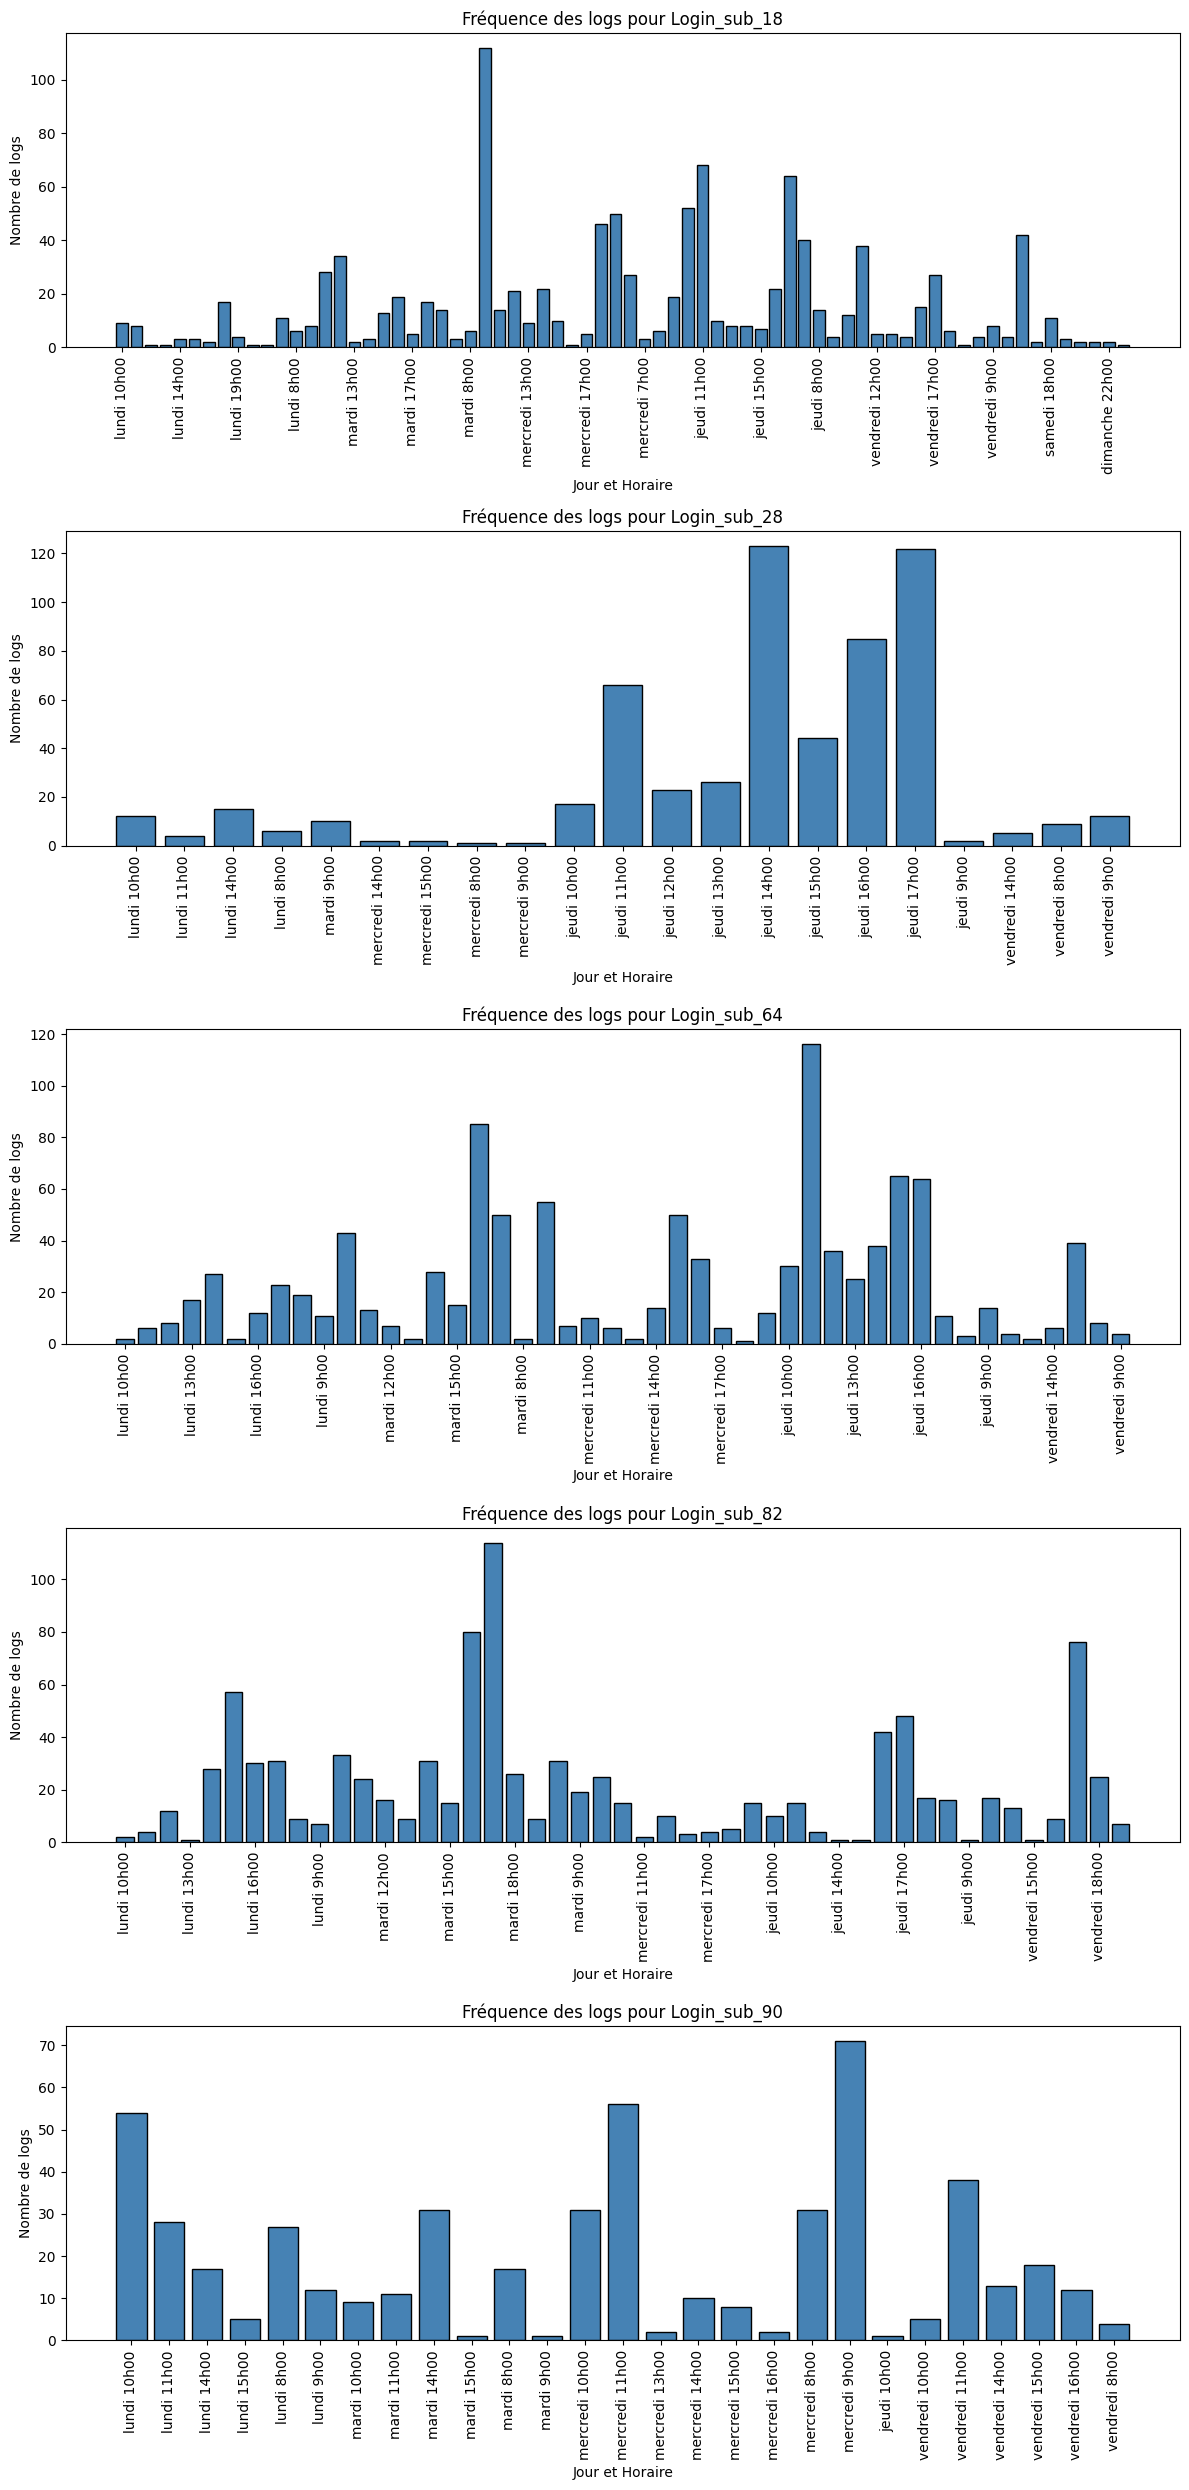

In [59]:
# Sélectionner les 15 Login les plus fréquents
top_login = df['Login'].value_counts().head(5).index
df_top_login = df[df['Login'].isin(top_login)]

# Compter les occurrences par Login et jour_horaire
freq_logs = df_top_login.groupby(['Login', 'jour_horaire']).size().reset_index(name='count')

# Trier les jours et horaires
freq_logs[['jour', 'horaire']] = freq_logs['jour_horaire'].str.split(' ', expand=True)
freq_logs['jour'] = pd.Categorical(freq_logs['jour'], categories=jours_semaine, ordered=True)
freq_logs = freq_logs.sort_values(['Login', 'jour', 'horaire'])

# Générer un graphique par Login
dashboard_list = freq_logs['Login'].unique()
fig, axes = plt.subplots(len(dashboard_list), 1, figsize=(12, 5 * len(dashboard_list)))

if len(dashboard_list) == 1:
    axes = [axes]  # S'assurer que axes est une liste si un seul graphique

for ax, dashboard in zip(axes, dashboard_list):
    subset = freq_logs[freq_logs['Login'] == dashboard]
    ax.bar(subset['jour_horaire'], subset['count'], color='steelblue', edgecolor='black')
    ax.set_title(f"Fréquence des logs pour {dashboard}")
    ax.set_xlabel("Jour et Horaire")
    ax.set_ylabel("Nombre de logs")
    ax.set_xticks(range(0, len(subset), max(1, len(subset) // 15)))
    ax.set_xticklabels(subset['jour_horaire'][::max(1, len(subset) // 15)], rotation=90, fontsize=10)

plt.tight_layout()
plt.show()

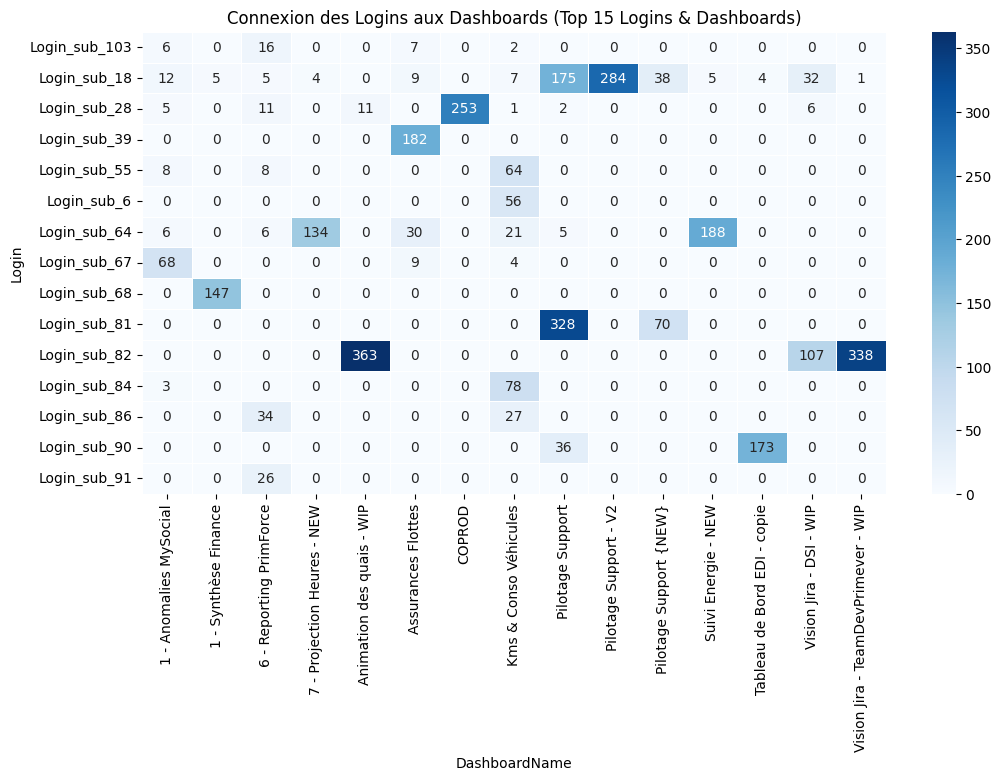

In [63]:
import seaborn as sns

# Sélectionner les 15 logins les plus fréquents
top_login = df['Login'].value_counts().head(15).index
df_top_login = df[df['Login'].isin(top_login)]

# Sélectionner les 15 dashboards les plus utilisés par ces logins
top_dashboard = df_top_login['DashboardName'].value_counts().head(15).index
df_top = df_top_login[df_top_login['DashboardName'].isin(top_dashboard)]

# Créer la matrice Login x DashboardName
login_dashboard_matrix = df_top.pivot_table(index='Login', columns='DashboardName', aggfunc='size', fill_value=0)

# Affichage de la heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(login_dashboard_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("DashboardName")
plt.ylabel("Login")
plt.title("Connexion des Logins aux Dashboards (Top 15 Logins & Dashboards)")
plt.xticks(rotation=90)
plt.show()